# Линейная алгебра: сходство текстов и аппроксимация функций

## Материалы

* Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html
* Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files
* Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html


### Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

$$f(x) = {sin({x \over 5}) * exp({x \over 10}) + 5 * exp({-x \over 2})}$$

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть $$ w_{0}+w_{1}x_{1}+w_{2}x^2+\ldots+w_{n}x^n $$ однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

\begin{equation*}
 \begin{cases}
   w_{0}+w_{1}x_{1}+w_{2}x^2_{1}+\ldots+w_{n}x^n_{1} = f(x_{1}) \\
   \ldots \\
   w_{0}+w_{1}x_{n+1}+w_{2}x^2_{n+1}+\ldots+w_{n}x^n_{n+1} = f(x_{n+1}) \\
 \end{cases}
\end{equation*}

где через x_1, ..., x_n обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

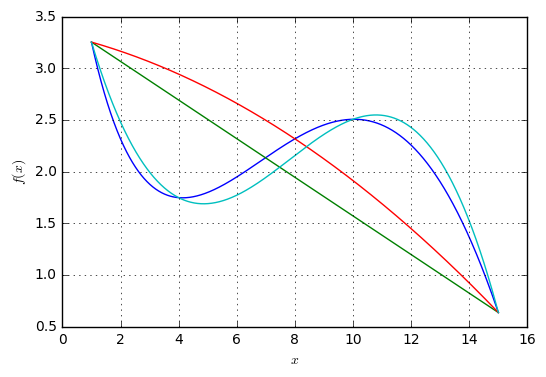

In [79]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# initial function
def f(x):
    return(np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2))

# polynom rank 1
rank = 1
A1 = np.array([
    [1**n for n in range(0, rank + 1)],
    [15**n for n in range(0, rank + 1)]
]).reshape(2, 2)

b1 = np.array([[f(1)], [f(15)]])


# polynom rank 2
rank = 2
A2 = np.array([
    [1**n for n in range(0, rank + 1)],
    [8**n for n in range(0, rank + 1)],
    [15**n for n in range(0, rank + 1)]
]).reshape(3, 3)

b2 = np.array([[f(1)], [f(8)], [f(15)]])

#polynom rank 3
rank = 3
A3 = np.array([
    [1**n for n in range(0, rank + 1)],
    [4**n for n in range(0, rank + 1)],
    [10**n for n in range(0, rank + 1)],
    [15**n for n in range(0, rank + 1)]
]).reshape(4, 4)

b3 = np.array([[f(1)], [f(4)], [f(10)], [f(15)]])

# solving linear equations
sp.linalg.solve(A1, b1)
sp.linalg.solve(A2, b2)
sp.linalg.solve(A3, b3)


# creating a plot
x = np.arange(1, 15.01, 0.01) # range of X values
plt.plot(x, np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)) #initial function
plt.plot(x, sp.linalg.solve(A1, b1).tolist()[0].pop() + sp.linalg.solve(A1, b1).tolist()[1].pop() * x)
plt.plot(x, sp.linalg.solve(A2, b2).tolist()[0].pop() + sp.linalg.solve(A2, b2).tolist()[1].pop() * x \
         + sp.linalg.solve(A2, b2).tolist()[2].pop() * x ** 2)
plt.plot(x, sp.linalg.solve(A3, b3).tolist()[0].pop() + sp.linalg.solve(A3, b3).tolist()[1].pop() * x \
         + sp.linalg.solve(A3, b3).tolist()[2].pop() * x ** 2 + sp.linalg.solve(A3, b3).tolist()[3].pop() * x ** 3)

plt.xlabel('$x$') # X axis
plt.ylabel('$f(x)$') # Y axis
plt.grid(True)
plt.show()


In [89]:
with open('task2result.txt', 'w') as file_write:
    for i in range(len(sp.linalg.solve(A3, b3).tolist())):
        file_write.write(str(sp.linalg.solve(A3, b3).tolist()[i].pop()) + ' ') 
!cat task2output.txt

4.36 -1.3 0.19 -0.01 